In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import random as rnd

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Bilder laden

dataset = datasets.cifar10.load_data()
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [3]:
images, labels = [], []

class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']

relImgPath = os.path.join("data", "images", "augmented")
imgPaths = []
for dirpath, dirnames, filenames in os.walk(relImgPath):
    if dirnames:
        classes = {}
        for index, name in enumerate(dirnames):
            classes[name]=index
    for filename in filenames:# [f for f in 
        path = os.path.join(dirpath, filename)
        key = dirpath[dirpath.rindex('\\')+1:]
        images.append(cv2.imread(path, cv2.COLOR_BGR2RGB))
        labels.append([classes[key]])

In [4]:
images = np.array(images)
labels = np.array(labels)

In [5]:
p = np.random.permutation(len(images))
images = images[p]
labels = labels[p]

In [6]:
ratio = 0.5

train_images, train_labels = images[:int(len(images)*ratio)], labels[:int(len(images)*ratio)]
test_images, test_labels = images[int(len(images)*ratio):], labels[int(len(images)*ratio):]

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
486/486 [==============================] - 13s 27ms/step - loss: 1.2535 - accuracy: 0.5457 - val_loss: 0.8996 - val_accuracy: 0.6021
Epoch 2/10
486/486 [==============================] - 13s 27ms/step - loss: 0.8489 - accuracy: 0.6213 - val_loss: 0.7982 - val_accuracy: 0.6466
Epoch 3/10
486/486 [==============================] - 13s 26ms/step - loss: 0.7623 - accuracy: 0.6696 - val_loss: 0.7344 - val_accuracy: 0.6791
Epoch 4/10
486/486 [==============================] - 12s 25ms/step - loss: 0.6818 - accuracy: 0.7111 - val_loss: 0.7111 - val_accuracy: 0.6959
Epoch 5/10
486/486 [==============================] - 12s 25ms/step - loss: 0.6217 - accuracy: 0.7408 - val_loss: 0.6217 - val_accuracy: 0.7448
Epoch 6/10
486/486 [==============================] - 13s 26ms/step - loss: 0.5542 - accuracy: 0.7726 - val_loss: 0.5802 - val_accuracy: 0.7650
Epoch 7/10
486/486 [==============================] - 13s 26ms/step - loss: 0.4957 - accuracy: 0.7994 - val_loss: 0.5464 - val_accuracy:

648/648 - 2s - loss: 0.4848 - accuracy: 0.8091


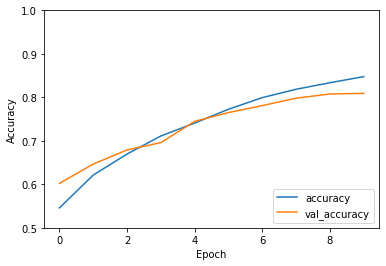

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

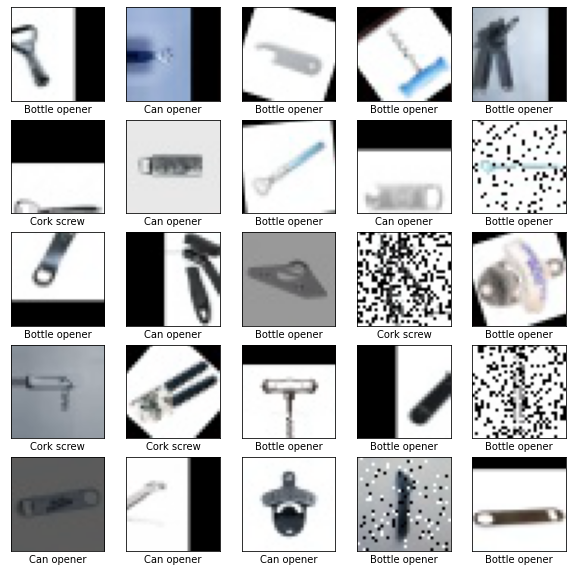

In [20]:
start = rnd

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

In [19]:
#model.save('models/test')